<a href="https://colab.research.google.com/github/yongug/Fly_python/blob/main/shapes_%EC%9D%B4%EC%9A%A9%EC%9A%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 240 images belonging to 4 classes.
Found 60 images belonging to 4 classes.
Epoch 1/100
8/8 [==============================] - 10s 611ms/step - loss: 1.4636 - accuracy: 0.3583 - val_loss: 1.2984 - val_accuracy: 0.3333
Epoch 2/100
8/8 [==============================] - 3s 436ms/step - loss: 1.2101 - accuracy: 0.3167 - val_loss: 1.2430 - val_accuracy: 0.3333
Epoch 3/100
8/8 [==============================] - 2s 279ms/step - loss: 1.1242 - accuracy: 0.3250 - val_loss: 1.1295 - val_accuracy: 0.3333
Epoch 4/100
8/8 [==============================] - 2s 299ms/step - loss: 1.1365 - accuracy: 0.3292 - val_loss: 1.1627 - val_accuracy: 0.3333
Epoch 5/100
8/8 [==============================] - 2s 280ms/step - loss: 1.1426 - accuracy: 0.3208 - val_loss: 1.2291 - val_accuracy: 0.3333
Epoch 6/100
8/8 [==============================] - 2s 286ms/step - loss: 1.1205 - accuracy: 0.3583 - val_loss: 1.1653 - val_accuracy: 0.3333
Epoch 7/100
8/8 [==============================] - 4s 462ms/step - loss:

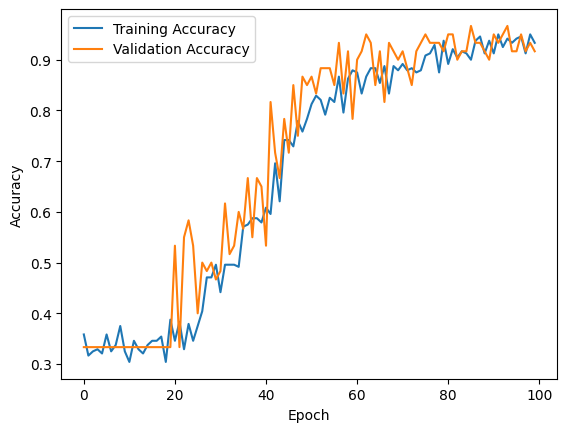

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 데이터 경로 설정
train_dir = '/content/shapes'  # Colab의 데이터 경로로 설정

# 이미지 전처리 및 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='reflect',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

# 트레이닝 데이터와 검증 데이터 생성
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 클래스 수 확인
num_classes = len(train_generator.class_indices)

# CNN 모델 설계
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# 모델 컴파일
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
cnn_history = cnn_model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator
)

# 학습 결과 시각화
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
